### 1)On the fruit dataset, compare the performance of Logistic Regression, SVM, KNN on the basis of  their accuracy.

In [1]:
import pandas as pd   # to load dataset
import matplotlib.pyplot as plt
import seaborn as sns 
import pylab as pl
from sklearn.model_selection import train_test_split   # for splitting dataset
from sklearn.preprocessing import MinMaxScaler  # for scaling
from sklearn.linear_model import LogisticRegression   # machine learning lib/model, # get accuracy by Logistic regression
from sklearn.tree import DecisionTreeClassifier  # get accuracy by Decision Tree classifier
from sklearn.neighbors import KNeighborsClassifier  # get accuracy by KNN classifier
from sklearn.naive_bayes import GaussianNB # get accuracy by GNB classifier

In [2]:
df=pd.read_csv('fruit_data.csv')

In [3]:
df.shape

(59, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [5]:
df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [6]:
print(df['fruit_name'].unique()) # unique fruits name

['apple' 'mandarin' 'orange' 'lemon']


In [7]:
print(df['fruit_subtype'].unique()) # unique fruit subtype

['granny_smith' 'mandarin' 'braeburn' 'golden_delicious' 'cripps_pink'
 'spanish_jumbo' 'selected_seconds' 'turkey_navel' 'spanish_belsan'
 'unknown']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


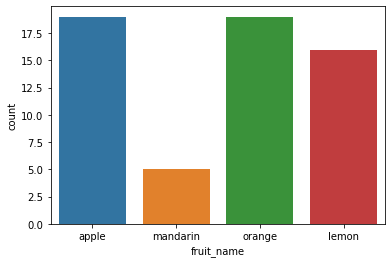

In [9]:
sns.countplot(df['fruit_name'],label='Count') # count plot
plt.show()

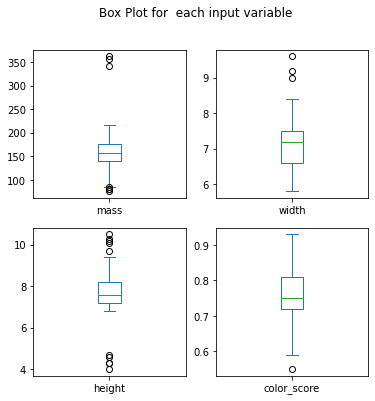

In [10]:
df.drop('fruit_label',axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(6,6), title='Box Plot for  each input variable')
plt.savefig('fruits_box')
plt.show()

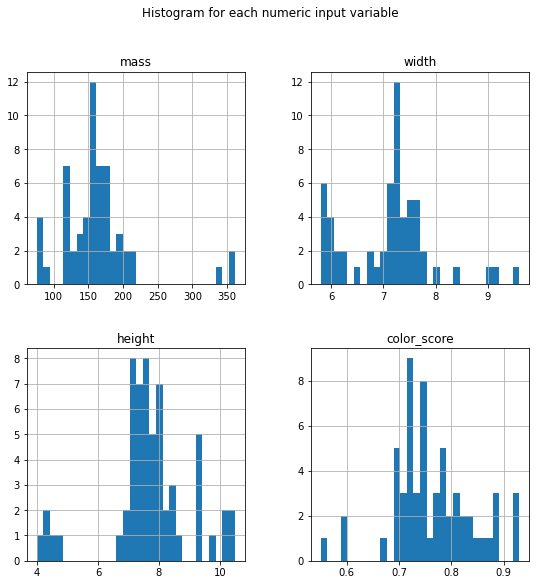

In [11]:
import pylab as pl

df.drop('fruit_label', axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')


In [12]:
plt.show()

<AxesSubplot:>

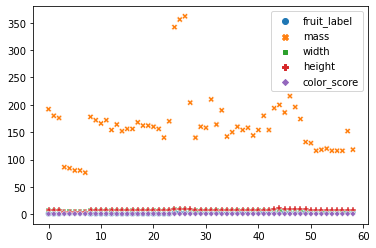

In [14]:
#scaterplot
sns.scatterplot(data=df)

In [15]:
#preparing data with scaling
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

feature_names = ['mass', 'width', 'height', 'color_score']
x=df[feature_names]
y=df['fruit_label']

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

print(x_train[:3]) # to check output

scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

print("\nAfter scaling\n")
print(x_train[:3]) # to check output

    mass  width  height  color_score
42   154    7.2     7.2         0.82
48   174    7.3    10.1         0.72
7     76    5.8     4.0         0.81

After scaling

[[0.27857143 0.41176471 0.49230769 0.72972973]
 [0.35       0.44117647 0.93846154 0.45945946]
 [0.         0.         0.         0.7027027 ]]


In [16]:
from sklearn.linear_model import LogisticRegression   # machine learning lib/model
feature_names = ['mass', 'width', 'height', 'color_score']
x=df[feature_names]
y=df['fruit_label']

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

#logistic regression
logreg = LogisticRegression()  # machine learning algorithm
logreg.fit(x_train, y_train)

#print score of train data
print('Accuracy of Logistic regression classifier on training set:{:.2f}'
     .format(logreg.score(x_train, y_train)))

#print score of test data
print('Accuracy of Logistic regression classifier on test set:{:.2f}'
     .format(logreg.score(x_test, y_test)))

Accuracy of Logistic regression classifier on training set:0.75
Accuracy of Logistic regression classifier on test set:0.47


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

feature_names = ['mass', 'width', 'height', 'color_score']
x=df[feature_names]
y=df['fruit_label']

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

# decission tree
clf = DecisionTreeClassifier().fit(x_train, y_train)

#print score of train data
print('Accuracy of Decision Tree classifier on training set:{:.2f}'
     .format(clf.score(x_train, y_train)))

#print score of test data
print('Accuracy of Decision Tree Classifier on test set:{:.2f}'
     .format(clf.score(x_test, y_test)))

Accuracy of Decision Tree classifier on training set:1.00
Accuracy of Decision Tree Classifier on test set:0.67


In [18]:
from sklearn.neighbors import KNeighborsClassifier

# KNN method
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

#print score of train data
print('Accuracy of KNN classifier on training set:{:.2f}'
     .format(knn.score(x_train, y_train)))

#print score of test data
print('Accuracy of KNN Classifier on test set:{:.2f}'
     .format(knn.score(x_test, y_test)))

Accuracy of KNN classifier on training set:0.95
Accuracy of KNN Classifier on test set:1.00


In [19]:
from sklearn.naive_bayes import GaussianNB

# Gaussian Naive bayes 
gnb = GaussianNB()
gnb.fit(x_train, y_train)

#print score of train data
print('Accuracy of GNB classifier on training set:{:.2f}'
     .format(gnb.score(x_train, y_train)))

#print score of test data
print('Accuracy of GNB Classifier on test set:{:.2f}'
     .format(gnb.score(x_test, y_test)))

Accuracy of GNB classifier on training set:0.86
Accuracy of GNB Classifier on test set:0.67


In [20]:
from sklearn.svm import SVC

# SVM classifier
svm = SVC()
svm.fit(x_train, y_train)

#print score of train data
print('Accuracy of SVM classifier on training set:{:.2f}'
     .format(svm.score(x_train, y_train)))

#print score of test data
print('Accuracy of SVM Classifier on test set:{:.2f}'
     .format(svm.score(x_test, y_test)))

Accuracy of SVM classifier on training set:0.91
Accuracy of SVM Classifier on test set:0.80


In [21]:
data = {'Training Accuracy (in %)':[75,100,95,86,91],'Testing Accuracy (in %)':[47,73,100,67,80]}  
   
df1 = pd.DataFrame(data, index =['Logistic Regression','Decision Tree','K-Nearest Neighbour (KNN)','Gaussian Naive Bayes','Support Vector Machine (SVM)'])  
  
df1


,Training Accuracy (in %),Testing Accuracy (in %)
Logistic Regression,75,47
Decision Tree,100,73
K-Nearest Neighbour (KNN),95,100
Gaussian Naive Bayes,86,67
Support Vector Machine (SVM),91,80
